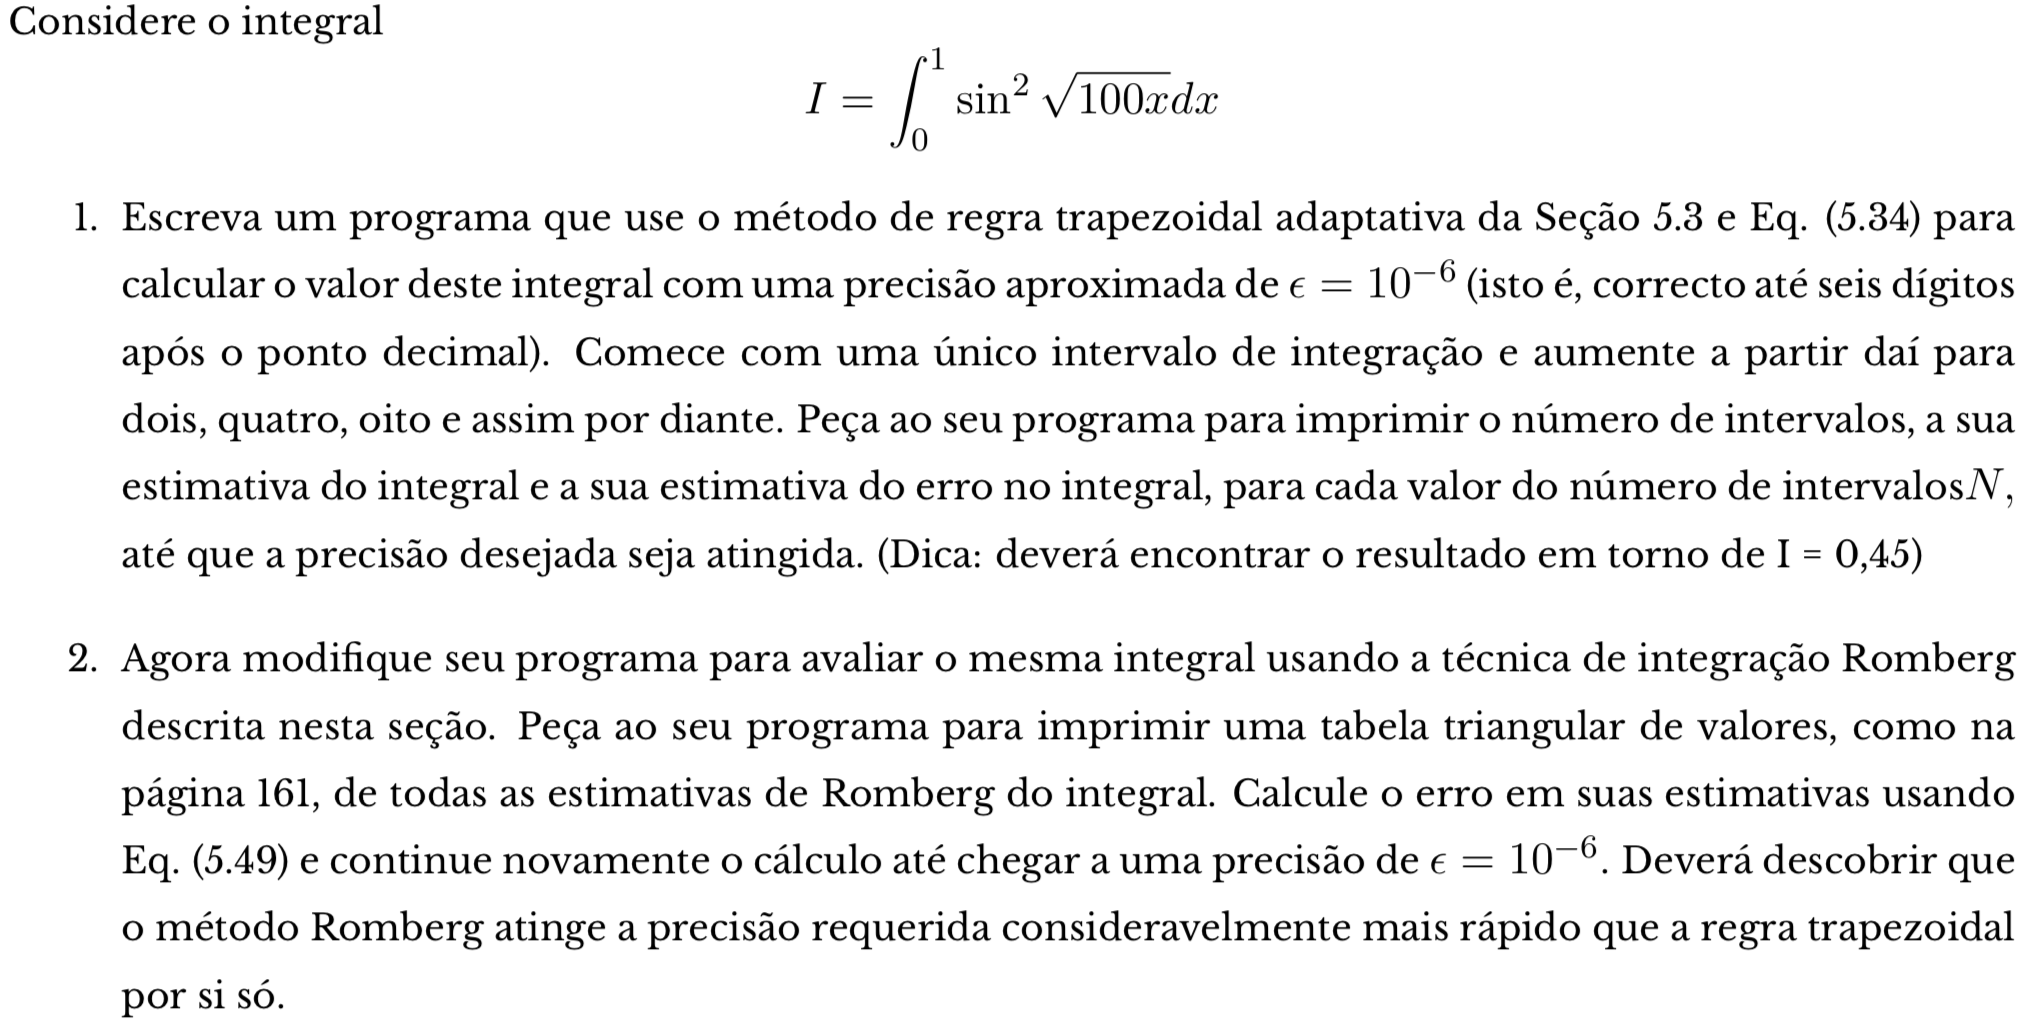

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def f(x):
    return (np.sin(np.sqrt(100 * x))) ** 2

In [5]:
def trapezoid(f, a, b, N):
    h = (b - a) / N
    x = np.linspace(a, b, N + 1)
    y = f(x)
    return  h * (.5 * y[0] + .5 * y[-1] + y[1:-1].sum())

In [111]:
def integral(f, a, b, N):
    error = 1e-5
    h = (b -a) / N
    x = np.linspace(a, b, N + 1)
    y = f(x)
    I1 = h * (.5 * y[0] + .5 * y[-1] + y[1:-1].sum())
    e = I1
    while e > error:
        h /= 2 
        x = np.arange(a + h, b, 2 * h)
        y = f(x)
        I2 = .5 * I1 + h * y.sum()
        e = 1 / 3 * abs(I2 - I1)
        I1 = I2
    return I2, e

In [112]:
print(integral(f, 0, 1, 100))

(0.45582942574871743, 3.106333908246365e-06)


In [124]:
def get_line(f, a, b, h, R, i):
    h /= 2**i
    x = np.arange(a + h, b, 2 * h)
    y = f(x)
    R[i, 0] = .5 * R[i-1, 0] + h * y.sum()
    for m in range(i):
        R[i, m + 1] = R[i, m] + 1/(4**(m+1) - 1) * (R[i, m] - R[i-1, m])

def romberg(f, a, b, N, error):
    i = 0
    R = np.zeros([5, 5])
    h = (b -a) / N
    x = np.linspace(a, b, N + 1)
    y = f(x)
    R[0, 0] = h * (.5 * y[0] + .5 * y[-1] + y[1:-1].sum())
    e = R[0, 0]
    while e > error:
        i += 1
        get_line(f, a, b, h, R, i)
        e = 1/(4**i - 1) * (R[i, i-1] - R[i-1, i-1])
    return R, e

In [132]:
print(romberg(f, 0, 1, 100, 1e-6))

(array([[0.45504094, 0.        , 0.        , 0.        , 0.        ],
       [0.45563394, 0.45583161, 0.        , 0.        , 0.        ],
       [0.45578284, 0.45583247, 0.45583253, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]]), 5.786062762617542e-08)
